In [6]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import os
import math

hpi_red = '#b00639'
hpi_blue = '#007a9e'
hpi_yellow = '#ffde94'
hpi_orange = '#f48642'

def create_folder(filename):
    if not os.path.exists(os.path.dirname(filename)):
        try:
            os.makedirs(os.path.dirname(filename))
        except OSError as exc: # Guard against race condition
            if exc.errno != errno.EEXIST:
                raise
                
def save_plot(filename):
    create_folder("plots/")
    plt.savefig('plots/{}.pdf'.format(filename), bbox_inches='tight', pad_inches=0)
    
    
def get_results():
    filename = "results.csv"
    return pd.read_csv(filename, header=0)

def select(data, data_type, store_type, prefetcher, cache_flush, column_count):
    return data[(data.data_type == data_type) & 
                (data.store_type == store_type) & 
                (data.prefetcher == prefetcher) &
                (data.cache_flush == cache_flush) &
                (data.column_count == column_count)]

def make_plot(store_type="column_store", prefetcher=1, cache_flush=1, column_count=50):
    data = get_results()
    fig, ax = plt.subplots()
    ax.grid()
    ax.set_xscale("log", nonposx='clip')
    store_title = store_type.replace("_", " ").title()
    if prefetcher == 1:
        prefetcher_title = "With Prefetching"
    else:
        prefetcher_title = "Without Prefetching"
    if cache_flush == 1:
        cache_flush_title = "With Cache Flush"
    else:
        cache_flush_title = "Without Cache Flush"
    plt.title("{} - {} - {} - {} columns".format(store_title, prefetcher_title, cache_flush_title, column_count))
    plt.ylabel('Bandwidth (GB/s)')
    plt.xlabel('Attribute Vector Size (KB)')
    data8  = select(data, "uint8_t",  store_type, prefetcher, cache_flush, column_count)
    data16 = select(data, "uint16_t", store_type, prefetcher, cache_flush, column_count)
    data32 = select(data, "uint32_t", store_type, prefetcher, cache_flush, column_count)
    data64 = select(data, "uint64_t", store_type, prefetcher, cache_flush, column_count)
    bar4 = plt.plot(data64["column_size"] / 1000, data64["bandwidth"], color=hpi_orange, label="uint64_t")
    bar3 = plt.plot(data32["column_size"] / 1000, data32["bandwidth"], color=hpi_yellow, label="uint32_t")
    bar2 = plt.plot(data16["column_size"] / 1000, data16["bandwidth"], color=hpi_blue, label="uint16_t")
    bar1 = plt.plot(data8["column_size"] / 1000,  data8["bandwidth"], color=hpi_red, label="uint8_t")
    ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0))
    textstr = "Cache Line: 64B\nL1d: 32KB\nL1i: 32KB\nL2: 256KB\nL3: 38400KB"
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax.text(1.075, 0.55, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)
    #save_plot("scan_bandwidth" + store_type)
    plt.show()

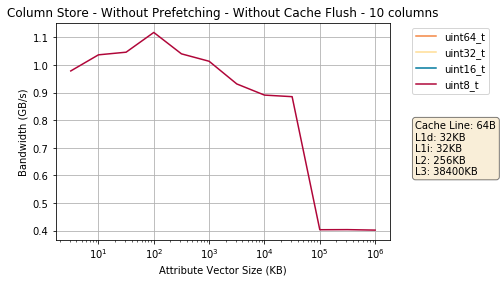

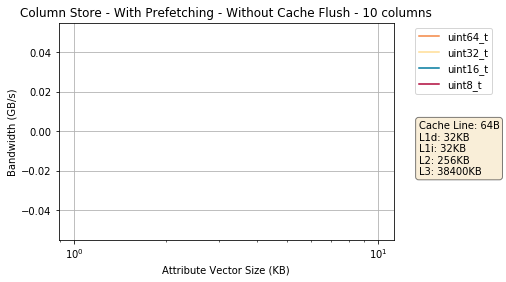

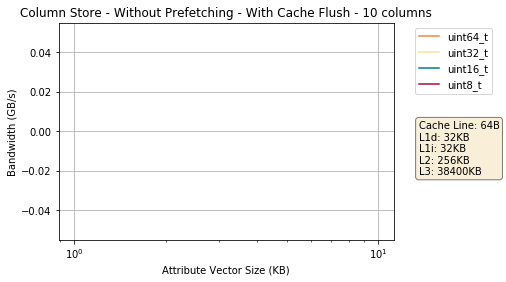

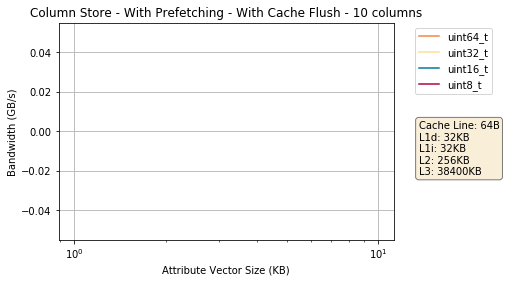

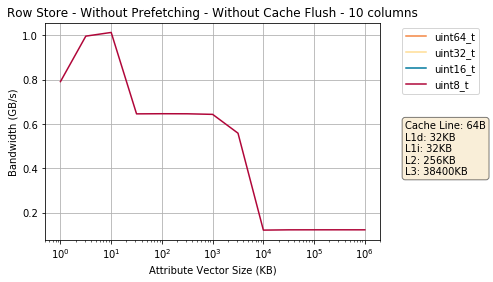

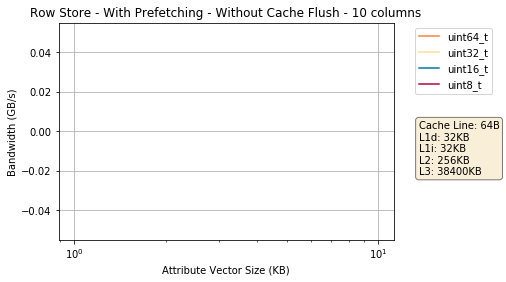

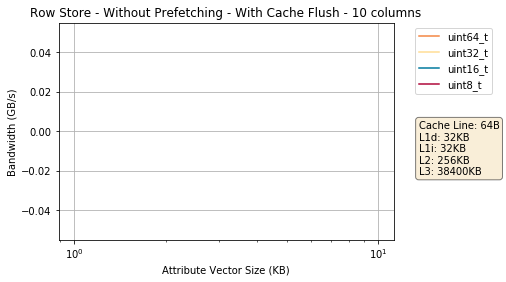

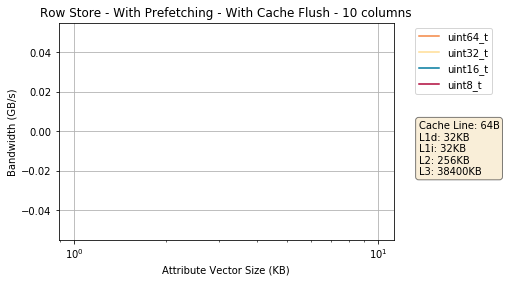

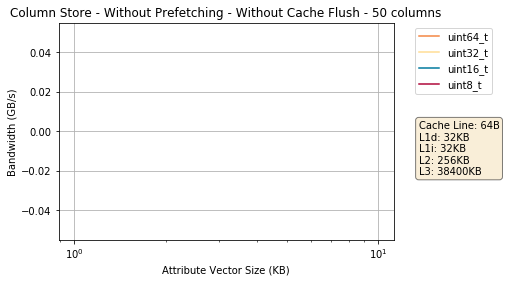

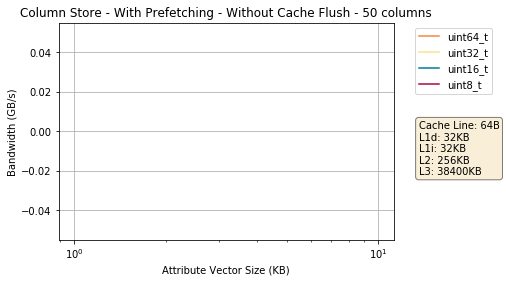

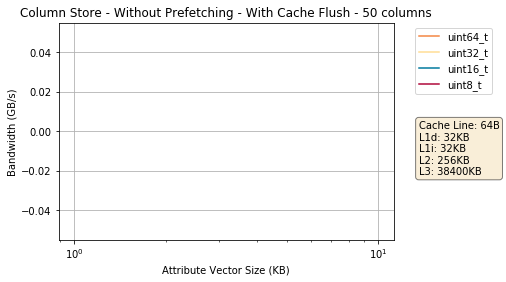

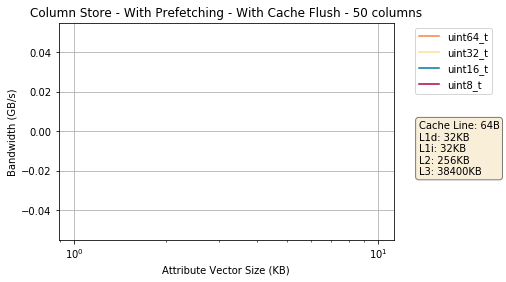

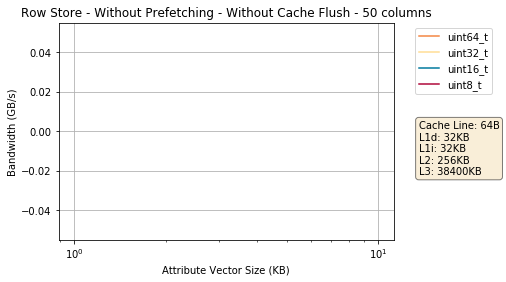

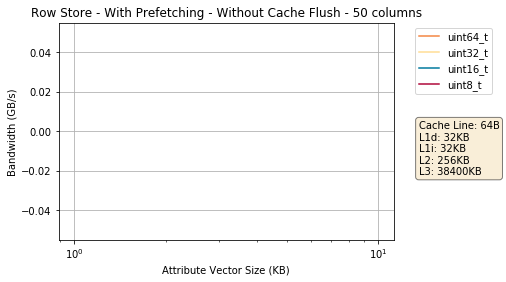

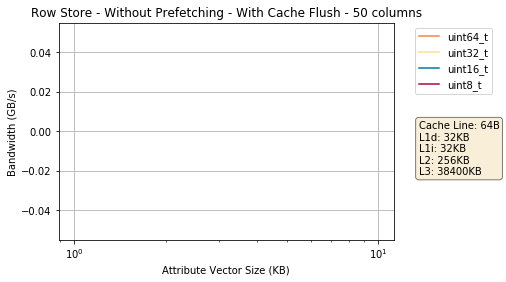

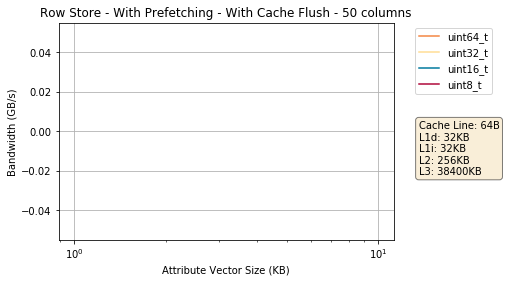

In [7]:
for column_count in [10, 50]:
    for store_type in ["column_store", "row_store"]:
        for cache_flush in [0, 1]:
            for prefetcher in [0, 1]:
                make_plot(store_type, prefetcher, cache_flush, column_count)